In [345]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [437]:
IMAGE_PATH = '../dataset/images/math-expresion.png'

In [438]:
image = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)
image.shape

(28, 300)

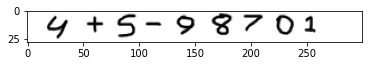

In [439]:
plt.imshow(image, cmap='gray')

In [440]:
image.max()

255

In [441]:
_, threshold = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(threshold.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

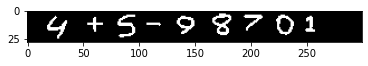

In [442]:
plt.imshow(threshold, cmap='gray')

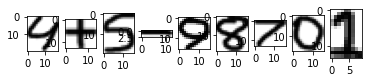

In [443]:
sorted_ctrs = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

fig, axs = plt.subplots(1, len(contours))

for index, contour in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(contour)
    
    roi = image[y:y+h, x:x+w]
    axs[index].imshow(roi, cmap='gray')
    # axs[index].axis('off')
    if index == 8:
        break

In [444]:
image_pad = np.ones((28, 28)) * 255.

In [445]:
x, y = roi.shape

In [446]:
image_pad[5:x+5,5:y+5] = roi

In [447]:
cv2.imwrite('../dataset/images/1.png', image_pad)

True

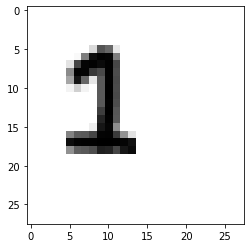

In [448]:
plt.imshow(image_pad, cmap='gray')